# PREDIKSI HARGA KENDARAAN DI AUSTRALIA
---
### ARYA WAHYU WIJAYA
### 50421223
### 3IA14

# Import Pustaka dan Membaca File CSV

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Australian Vehicle Prices.csv')

In [3]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


# Cek Dimensi Data + Tipe Data

In [4]:
data_shape = df.shape
data_types = df.dtypes

data_shape, data_types

((16734, 19),
 Brand                 object
 Year                 float64
 Model                 object
 Car/Suv               object
 Title                 object
 UsedOrNew             object
 Transmission          object
 Engine                object
 DriveType             object
 FuelType              object
 FuelConsumption       object
 Kilometres            object
 ColourExtInt          object
 Location              object
 CylindersinEngine     object
 BodyType              object
 Doors                 object
 Seats                 object
 Price                 object
 dtype: object)

# Mengubah 'Kilometres', 'FuelConsumption', and 'Price' columns ke numeric 

In [5]:
df['Kilometres'] = pd.to_numeric(df['Kilometres'].str.replace(',', '').str.extract('(\d+)', expand=False), errors='coerce')
df['FuelConsumption'] = pd.to_numeric(df['FuelConsumption'].str.extract('(\d+\.?\d*)', expand=False), errors='coerce')
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

# Cek missing value & Generate statistik dasar

In [6]:
missing_values = df.isnull().sum()
stats = df.describe()

missing_values, stats

(Brand                   1
 Year                    1
 Model                   1
 Car/Suv                28
 Title                   1
 UsedOrNew               1
 Transmission            1
 Engine                  1
 DriveType               1
 FuelType                1
 FuelConsumption      1698
 Kilometres            592
 ColourExtInt            1
 Location              450
 CylindersinEngine       1
 BodyType              282
 Doors                1604
 Seats                1705
 Price                  53
 dtype: int64,
                Year  FuelConsumption     Kilometres         Price
 count  16733.000000     15036.000000   16142.000000  1.668100e+04
 mean    2016.229248         7.663661  100096.109714  3.730333e+04
 std        5.247705         2.324609   78213.114589  3.717787e+04
 min     1940.000000         0.000000       1.000000  8.800000e+01
 25%     2013.000000         6.500000   40757.000000  1.899900e+04
 50%     2017.000000         7.600000   85951.500000  2.950000e+04
 75

# Deteksi Outliers

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Outlier detection using boxplots
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

# Boxplot for Price

Text(0.5, 1.0, 'Outlier Detection: Price')

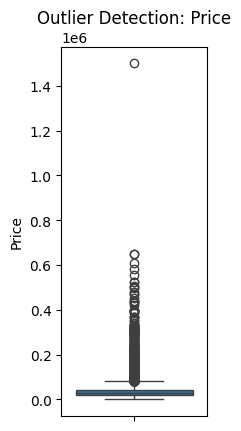

In [9]:
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Price'])
plt.title('Outlier Detection: Price')

# Boxplot for Kilometres

Text(0.5, 1.0, 'Outlier Detection: Kilometres')

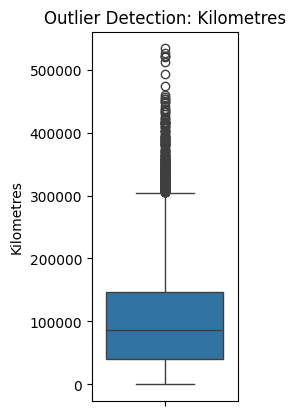

In [10]:
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Kilometres'])
plt.title('Outlier Detection: Kilometres')

# Boxplot for FuelConsumption

Text(0.5, 1.0, 'Outlier Detection: Fuel Consumption')

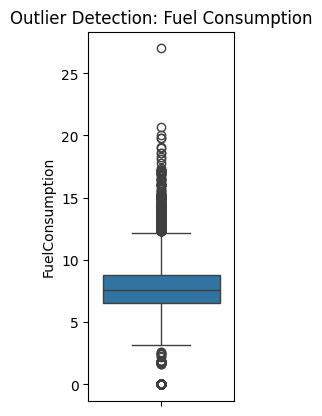

In [11]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df['FuelConsumption'])
plt.title('Outlier Detection: Fuel Consumption')

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Price Distribution (Histogram)

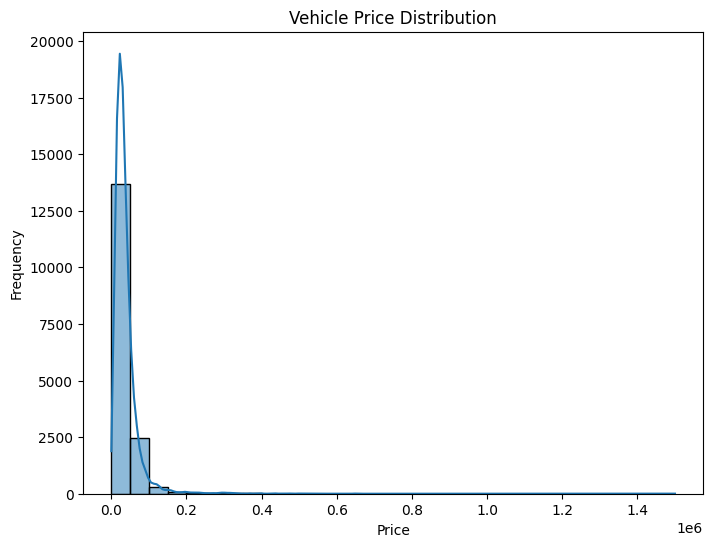

In [13]:
# Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Vehicle Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Kilometres vs. Price (Scatter Plot)

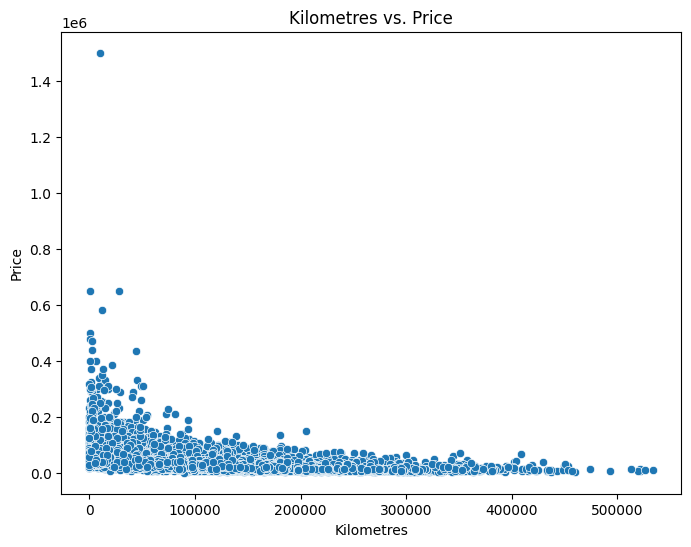

In [14]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Kilometres', y='Price', data=df)
plt.title('Kilometres vs. Price')
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.show()

# Perbandingan Konsumsi Bahan Bakar Berdasarkan BodyType (Bar Plot)

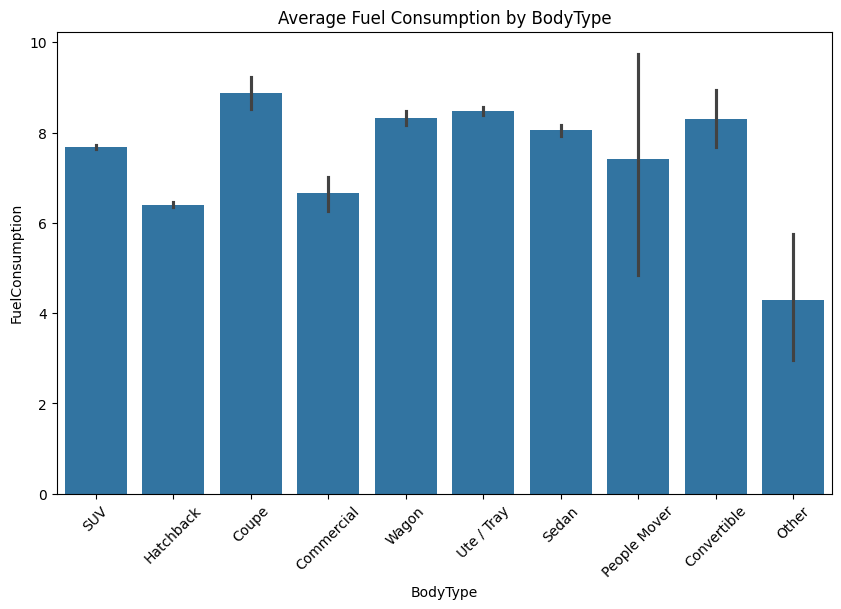

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BodyType', y='FuelConsumption', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Fuel Consumption by BodyType')
plt.xticks(rotation=45)
plt.show()

# Modelling & Evaluasi (Prediksi Harga)

In [16]:
# Modelling (Predicting Price)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [17]:
# Define target variable and features
X = df.drop(columns=['Price'])
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Define preprocessing for numerical and categorical features
numeric_features = ['Year', 'Kilometres', 'FuelConsumption']
categorical_features = ['Brand', 'Model', 'Transmission', 'DriveType', 'FuelType']

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Combine preprocessing into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [20]:
# Define a random forest model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor(random_state=42))])

In [21]:
# Impute missing values in the target variable (Price) with the median
df['Price'].fillna(df['Price'].median(), inplace=True)

X = df.drop(columns=['Price'])
y = df['Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Year', 'Kilometres',
                                                   'FuelConsumption']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Model',
                                                   'Transmission', 'DriveType',
                                                   'FuelType'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [23]:
# Predict and evaluate the model
y_pred = model.predict(X_test)

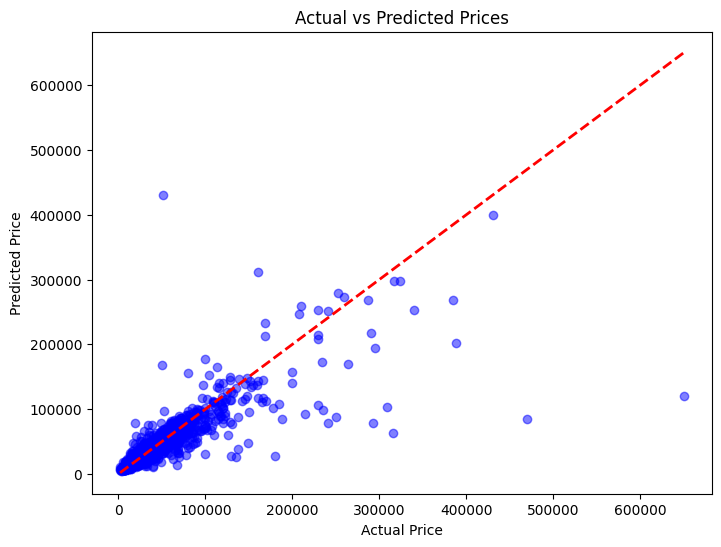

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 6202.98
Mean Squared Error (MSE): 383272995.09
Root Mean Squared Error (RMSE): 19577.36
R-squared (R²): 0.69


# PENJELASAN
---
- MAE: Memberikan kesalahan rata-rata dalam dolar (atau mata uang yang digunakan untuk harga). Nilai yang lebih rendah lebih baik.
- MSE: Menghukum kesalahan yang lebih besar dengan mengkuadratkan perbedaannya. Nilai yang lebih rendah lebih baik.
- RMSE: Mirip dengan UMK tetapi dalam satuan yang sama dengan target yang diprediksi (Harga dalam hal ini). Nilai yang lebih rendah menunjukkan kinerja yang lebih baik.
- R²: Menjelaskan proporsi varians variabel dependen yang dapat diprediksi oleh variabel independen. Nilai yang mendekati 1 lebih baik.